# Lending Club - Loan Data - EDA

##### Install external libraries and other initial setup

In [1]:
!python -m venv env
!source env/bin/activate
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
You should consider upgrading via the '/Users/1130204/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


##### Import libraries

In [104]:
#import the libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
# Set maximum number of rows and columns to be output by pandas
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200



##### Import Lending club data

In [51]:
#read the dataset and check the first five rows
df = pd.read_csv("loan.csv")
df.head()

/var/folders/8j/sty6gdld29d1nfd_3_wmkf5s277brs/T/ipykernel_75588/1671606908.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Initial Data Exploration

In [52]:
# Checking non-null count and datatypes for cleaning later
df.info(max_cols=112)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [53]:
# Gives the percentage of null values in specific columns. This will aid in cleaning later. 
(df.isna().sum()/df.shape[0]).sort_values()

id                                0.000000
earliest_cr_line                  0.000000
inq_last_6mths                    0.000000
open_acc                          0.000000
pub_rec                           0.000000
revol_bal                         0.000000
total_acc                         0.000000
initial_list_status               0.000000
out_prncp                         0.000000
out_prncp_inv                     0.000000
delinq_2yrs                       0.000000
total_pymnt                       0.000000
total_rec_int                     0.000000
total_rec_late_fee                0.000000
recoveries                        0.000000
collection_recovery_fee           0.000000
last_pymnt_amnt                   0.000000
policy_code                       0.000000
application_type                  0.000000
acc_now_delinq                    0.000000
delinq_amnt                       0.000000
total_pymnt_inv                   0.000000
dti                               0.000000
total_rec_p



### Data cleaning



#### Handle missing values
1. Drop columns with over 30% NA values

In [78]:
# The below is the list of fields to be deleted in upcoming command. 
# Tolerance for missing percentage can be varied, to perform additional cleaning of missing values
# Set to 30% here
tolerance = 0.30
drop_columns = list(df.loc[:,((df.isna().sum()/df.shape[0]).sort_values()>=tolerance)].columns)

# Loan url is not required for analysis
drop_columns.append('url')

# used below for copying list to excel
# for i in drop_columns:     
    # print(i)

clean_df = df.drop(axis='columns', columns=drop_columns)

# Alternate command to Drop all columns with 100% null values only
# clean_df = df.dropna(axis='columns', how = 'all')


2. Replace Missing values for few columns (if possible)

In [79]:
# The below text/categorical data is recorded as Missing. If this causes errors, they can be normalized or removed from analysis. 
clean_df['title'] = clean_df['title'].fillna("Missing")
clean_df['emp_title'] = clean_df['emp_title'].fillna("Missing")
clean_df['emp_length'] = clean_df['emp_length'].fillna("Missing") #This could be grouped in specific bins, if required. 

# Public record of bankruptcies are assumed to be zero, if no information is present. 
clean_df['pub_rec_bankruptcies'] = clean_df['pub_rec_bankruptcies'].fillna(0)


3. Remove rows that contain remaining NA values

In [80]:
# Tolerance for missing percentage can be varied, to perform additional cleaning/removol of rows that contain any missing values
# Set to 2% here

# min_tolerance = 0.02
# na_values_percent = (clean_df.isna().sum()/clean_df.shape[0]).sort_values()
# drop_rows = (na_values_percent <=min_tolerance) & (na_values_percent > 0) 
# print(drop_rows)

clean_df = clean_df.dropna(axis='rows', how = 'any')

In [81]:
# Final check to ensure all the data has been cleaned. 
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39542 entries, 0 to 39665
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39542 non-null  int64  
 1   member_id                   39542 non-null  int64  
 2   loan_amnt                   39542 non-null  int64  
 3   funded_amnt                 39542 non-null  int64  
 4   funded_amnt_inv             39542 non-null  float64
 5   term                        39542 non-null  object 
 6   int_rate                    39542 non-null  object 
 7   installment                 39542 non-null  float64
 8   grade                       39542 non-null  object 
 9   sub_grade                   39542 non-null  object 
 10  emp_title                   39542 non-null  object 
 11  emp_length                  39542 non-null  object 
 12  home_ownership              39542 non-null  object 
 13  annual_inc                  395


Clean datatypes for object type in dataframe

In [82]:
# List of object types 
object_columns = clean_df.select_dtypes(['object','category']).columns
print(object_columns)

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')


In [83]:
# View the objects type columns to check if any discrepancies can be picked up
clean_df.describe(include = ['object','category'])

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
count,39542,39542,39542,39542,39542,39542,39542,39542,39542,39542,39542,39542,39542,39542,39542,39542,39542,39542,39542,39542,39542
unique,2,371,7,35,28699,12,5,3,53,3,1,14,19510,821,50,526,1089,1,101,103,1
top,36 months,10.99%,B,B3,Missing,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,debt_consolidation,Debt Consolidation,100xx,CA,Nov-98,0%,f,May-16,May-16,INDIVIDUAL
freq,28941,956,11990,2914,2437,8866,18797,16799,2259,32865,39542,18588,2180,592,7070,370,973,39542,1256,10278,39542


 Convert numeric output to int/float by stripping months,% in quantitative data. 

In [84]:
# Drop columns with only one value or too many values (title - just raw text & purpose gives better categorical info about the loan)
clean_df = clean_df.drop(columns = ['initial_list_status', 'pymnt_plan', 'application_type', 'title', 'emp_title'], axis = 'columns')

Convert numeric output to int/float by stripping months,%

In [85]:
clean_df['term'] = clean_df['term'].str.strip("months").astype('int')
clean_df['int_rate'] = clean_df['int_rate'].str.strip("/%").astype('float')
clean_df['revol_util'] = clean_df['revol_util'].str.strip("/%").astype('float')

 Remove/Convert numerical data that are not required

In [86]:
clean_df.describe(percentiles = [0.25, 0.5, 0.75, 0.05, 0.95])

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.954200e+04,3.954200e+04,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,3.954200e+04,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.0,39542.0,39542.0,39542.0,39542.0,39542.000000,39542.0
mean,6.841625e+05,8.518001e+05,11239.948662,10967.015452,10424.581493,42.434272,12.016987,325.072355,6.901052e+04,13.327863,0.146250,0.868772,9.303222,0.055005,13408.639598,48.855617,22.117774,51.454605,51.215432,12191.190829,11610.522332,9824.148535,2271.245823,1.365813,94.430739,12.310385,2689.100460,0.0,1.0,0.0,0.0,0.0,0.042461,0.0
std,2.096981e+05,2.643148e+05,7456.140891,7186.230005,7124.876138,10.631347,3.724799,208.849599,6.382874e+04,6.674306,0.491017,1.070042,4.399111,0.237127,15891.102264,28.328132,11.396346,375.986626,374.635352,9039.709631,8936.981386,7061.661681,2610.838096,7.302717,686.356810,148.507645,4453.697576,0.0,0.0,0.0,0.0,0.0,0.202517,0.0
min,5.473400e+04,7.472400e+04,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
5%,3.736375e+05,3.912222e+05,2400.000000,2400.000000,1950.000000,36.000000,6.170000,72.020000,2.400000e+04,2.140000,0.000000,0.000000,3.000000,0.000000,341.050000,2.700000,7.000000,0.000000,0.000000,1947.492500,1488.959500,1391.509500,191.982000,0.000000,0.000000,0.000000,45.725000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.168830e+05,6.675642e+05,5500.000000,5450.000000,5000.000000,36.000000,9.250000,167.340000,4.072500e+04,8.200000,0.000000,0.000000,6.000000,0.000000,3729.000000,25.500000,14.000000,0.000000,0.000000,5599.813416,5165.157500,4669.850000,667.052500,0.000000,0.000000,0.000000,220.875000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.663915e+05,8.518615e+05,10000.000000,9750.000000,8998.502587,36.000000,11.830000,280.970000,5.900000e+04,13.410000,0.000000,1.000000,9.000000,0.000000,8874.000000,49.300000,20.000000,0.000000,0.000000,9952.560934,9329.470000,8000.000000,1354.880000,0.000000,0.000000,0.000000,549.875000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.382260e+05,1.047789e+06,15000.000000,15000.000000,14400.000000,60.000000,14.540000,431.367500,8.240300e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17085.750000,72.400000,29.000000,0.000000,0.000000,16576.415875,15834.585000,13750.000000,2843.122500,0.000000,0.000000,0.000000,3313.782500,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
95%,1.040037e+06,1.269583e+06,25000.000000,25000.000000,24747.246797,60.000000,18.540000,763.806500,1.415700e+05,23.840000,1.000000,3.000000,17.000000,1.000000,41674.800000,93.600000,43.000000,0.000000,0.000000,30266.730729,29669.813500,24999.990000,7590.750000,14.924945,356.317000,5.036460,12194.142000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


Convert id and member_id field to text

In [87]:
clean_df['id'] = clean_df['id'].astype('string')
clean_df['member_id'] = clean_df['member_id'].astype('string')

Remove data that's fairly constant/not relevant to the problem statement (eg. fees/current payments etc.)

In [88]:
# Drop columns with only one value or too many values (title - just raw text & purpose gives better categorical info about the loan)
clean_df = clean_df.drop(columns = ['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'policy_code', 'collections_12_mths_ex_med', 'collection_recovery_fee', 'recoveries', 'total_rec_late_fee', 'total_rec_int'], axis = 'columns')

Convert Month/Year in columns to pandas period

In [96]:
# Converting month/year to pandas period to preserve chronological order
clean_df['last_pymnt_d'] = pd.to_datetime(clean_df['last_pymnt_d'], format = "%b-%y").dt.to_period('M')
clean_df['last_credit_pull_d'] = pd.to_datetime(clean_df['last_credit_pull_d'], format = "%b-%y").dt.to_period('M')
clean_df['earliest_cr_line'] = pd.to_datetime(clean_df['earliest_cr_line'], format = "%b-%y").dt.to_period('M')
clean_df['issue_d'] = pd.to_datetime(clean_df['issue_d'], format = "%b-%y").dt.to_period('M')


Summary of data after cleaning

In [97]:
clean_df.describe(include = ['object', 'category'])

,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,purpose,zip_code,addr_state
count,39542,39542,39542,39542,39542,39542,39542,39542,39542
unique,7,35,12,5,3,3,14,821,50
top,B,B3,10+ years,RENT,Not Verified,Fully Paid,debt_consolidation,100xx,CA
freq,11990,2914,8866,18797,16799,32865,18588,592,7070


In [101]:
clean_df.describe(include = ['period[M]'])

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
count,39542,39542,39542,39542
unique,53,526,101,103
top,2011-12,1998-11,2016-05,2016-05
freq,2259,370,1256,10278


In [103]:
clean_df.describe(percentiles = [0.05, 0.25, 0.5, 0.76, 0.95])

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,last_pymnt_amnt,pub_rec_bankruptcies
count,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,3.954200e+04,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000
mean,11239.948662,10967.015452,10424.581493,42.434272,12.016987,325.072355,6.901052e+04,13.327863,0.146250,0.868772,9.303222,0.055005,13408.639598,48.855617,22.117774,51.454605,51.215432,12191.190829,11610.522332,9824.148535,2689.100460,0.042461
std,7456.140891,7186.230005,7124.876138,10.631347,3.724799,208.849599,6.382874e+04,6.674306,0.491017,1.070042,4.399111,0.237127,15891.102264,28.328132,11.396346,375.986626,374.635352,9039.709631,8936.981386,7061.661681,4453.697576,0.202517
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,33.730000,0.000000,0.000000,0.010000,0.000000
5%,2400.000000,2400.000000,1950.000000,36.000000,6.170000,72.020000,2.400000e+04,2.140000,0.000000,0.000000,3.000000,0.000000,341.050000,2.700000,7.000000,0.000000,0.000000,1947.492500,1488.959500,1391.509500,45.725000,0.000000
25%,5500.000000,5450.000000,5000.000000,36.000000,9.250000,167.340000,4.072500e+04,8.200000,0.000000,0.000000,6.000000,0.000000,3729.000000,25.500000,14.000000,0.000000,0.000000,5599.813416,5165.157500,4669.850000,220.875000,0.000000
50%,10000.000000,9750.000000,8998.502587,36.000000,11.830000,280.970000,5.900000e+04,13.410000,0.000000,1.000000,9.000000,0.000000,8874.000000,49.300000,20.000000,0.000000,0.000000,9952.560934,9329.470000,8000.000000,549.875000,0.000000
76%,15000.000000,15000.000000,14750.000000,60.000000,14.650000,442.924400,8.400000e+04,18.830000,0.000000,1.000000,12.000000,0.000000,17573.000000,73.400000,29.000000,0.000000,0.000000,16911.830889,16236.850800,14000.000000,3528.991600,0.000000
95%,25000.000000,25000.000000,24747.246797,60.000000,18.540000,763.806500,1.415700e+05,23.840000,1.000000,3.000000,17.000000,1.000000,41674.800000,93.600000,43.000000,0.000000,0.000000,30266.730729,29669.813500,24999.990000,12194.142000,0.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,36115.200000,2.000000


Now that data looks clean, we could proceed with univariate analysis and outlier removal. 

Also, if any other columns that are not relevant to the analysis can be dropped off. 

### Univariate Analysis

In [106]:
clean_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 39542 entries, 0 to 39665
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype    
---  ------                --------------  -----    
 0   id                    39542 non-null  string   
 1   member_id             39542 non-null  string   
 2   loan_amnt             39542 non-null  int64    
 3   funded_amnt           39542 non-null  int64    
 4   funded_amnt_inv       39542 non-null  float64  
 5   term                  39542 non-null  int64    
 6   int_rate              39542 non-null  float64  
 7   installment           39542 non-null  float64  
 8   grade                 39542 non-null  object   
 9   sub_grade             39542 non-null  object   
 10  emp_length            39542 non-null  object   
 11  home_ownership        39542 non-null  object   
 12  annual_inc            39542 non-null  float64  
 13  verification_status   39542 non-null  object   
 14  issue_d               39542 non-null  

Histogram for Quantitative fields

loan_amnt


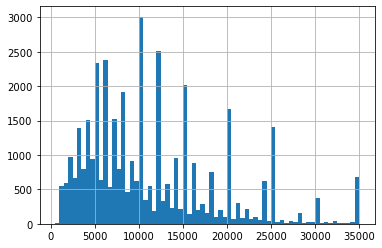

funded_amnt


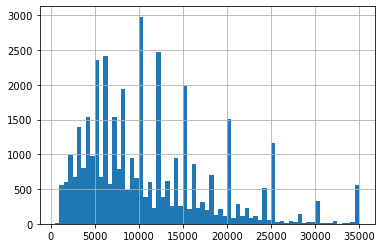

funded_amnt_inv


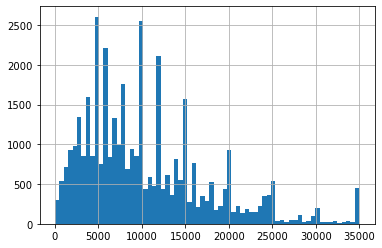

term


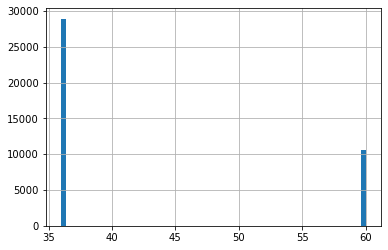

int_rate


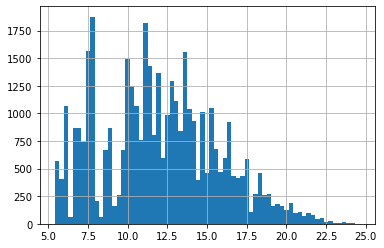

installment


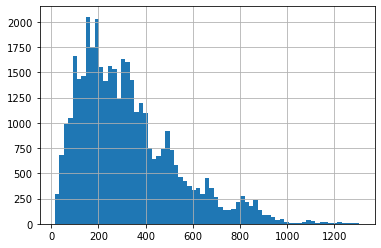

annual_inc


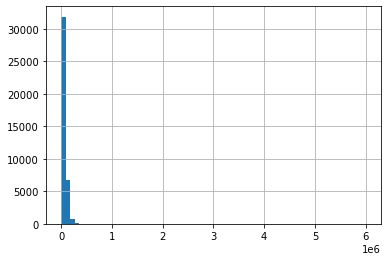

dti


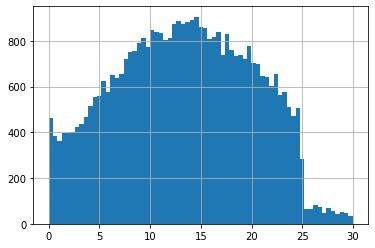

delinq_2yrs


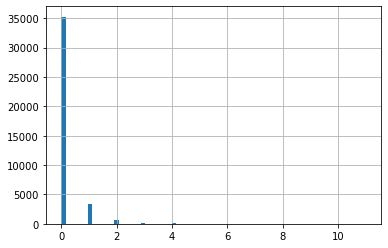

inq_last_6mths


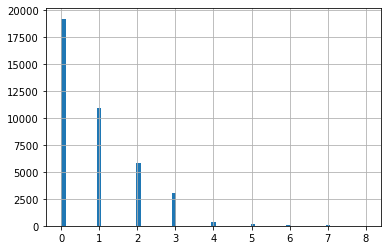

open_acc


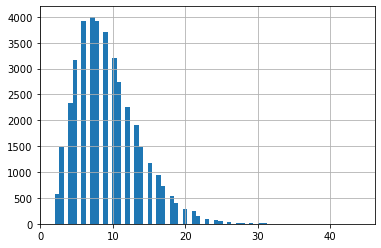

pub_rec


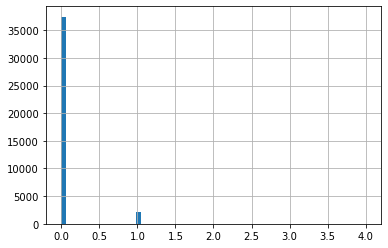

revol_bal


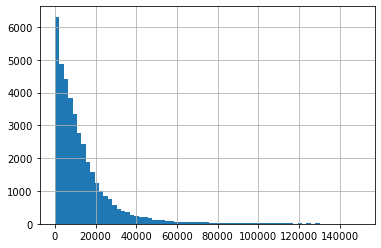

revol_util


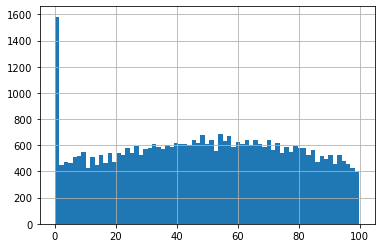

total_acc


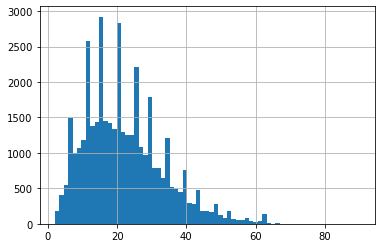

out_prncp


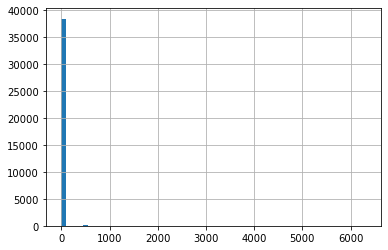

out_prncp_inv


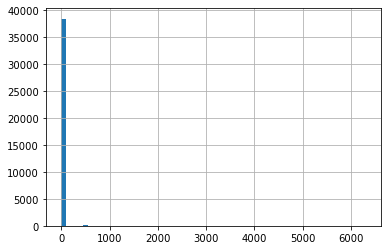

total_pymnt


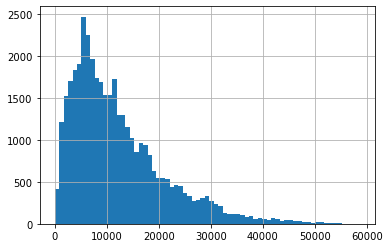

total_pymnt_inv


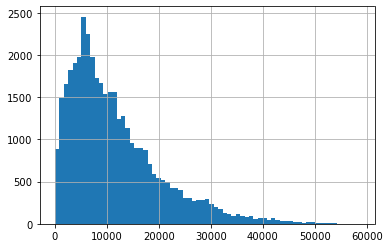

total_rec_prncp


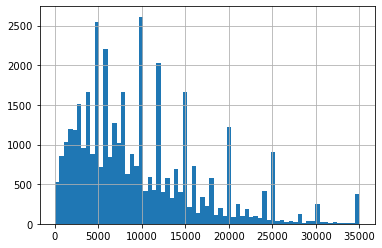

last_pymnt_amnt


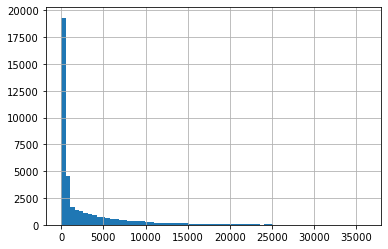

pub_rec_bankruptcies


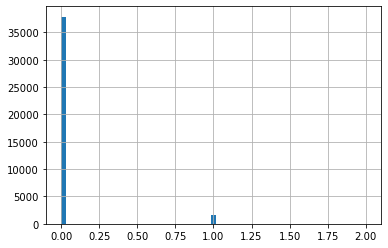

loan_status_encoded


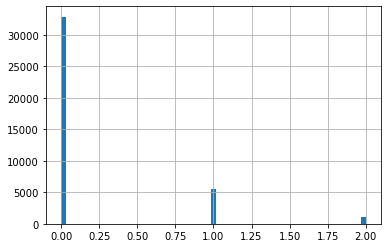

In [167]:
count=0
for i in clean_df.columns: 
    if clean_df[i].dtype in ['int64', 'float64']:
        print(i)
        count+=1
        clean_df[i].hist(bins='rice')
        plt.show()

In [179]:
# Create New fields required to find driver variables

# Encode loan status to numeric values to generate 
def numeric(loan_status):
    if loan_status =='Fully Paid': 
        return 0
    elif loan_status =='Charged Off':
        return 1
    elif loan_status =='Current':
        return 2

clean_df['loan_status_encoded']= df['loan_status'].apply(numeric)

# Calculate income to loan ratio
clean_df['income_to_loan_ratio'] = df['loan_amnt']/df['annual_inc']

0        0.208333
1        0.083333
2        0.195886
3        0.203252
4        0.037500
           ...   
39661    0.060000
39662    0.024000
39663    0.222222
39664    0.028571
39665    0.100000
Name: income_to_loan_ratio, Length: 39542, dtype: float64

In [180]:
non_current_df = clean_df[clean_df['loan_status_encoded']<=1]

In [181]:
non_current_df.shape

(38402, 39)

### Multivariate Analysis

In [189]:
corr=non_current_df.corr()


loan_amnt               0.603724
funded_amnt             0.591699
funded_amnt_inv         0.562218
term                    0.278039
int_rate                0.208336
installment             0.544093
annual_inc             -0.233948
dti                     0.143496
delinq_2yrs            -0.063075
inq_last_6mths         -0.028040
open_acc               -0.043823
pub_rec                -0.036406
revol_bal              -0.012703
revol_util              0.028171
total_acc              -0.060538
out_prncp                    NaN
out_prncp_inv                NaN
total_pymnt             0.502475
total_pymnt_inv         0.480534
total_rec_prncp         0.472306
last_pymnt_amnt         0.249187
pub_rec_bankruptcies   -0.022725
loan_status_encoded     0.119352
income_to_loan_ratio    1.000000
Name: income_to_loan_ratio, dtype: float64

In [190]:
corr.style.background_gradient(cmap='coolwarm')

/Users/1130204/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/1130204/opt/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,last_pymnt_amnt,pub_rec_bankruptcies,loan_status_encoded,income_to_loan_ratio
loan_amnt,1.000000,0.981705,0.938427,0.346253,0.302818,0.932023,0.269333,0.061480,-0.031676,0.012294,0.176160,-0.050000,0.313813,0.063352,0.255018,nan,nan,0.883146,0.849023,0.847141,0.474587,-0.035165,0.061729,0.603724
funded_amnt,0.981705,1.000000,0.956825,0.324426,0.306479,0.957911,0.265130,0.061267,-0.031595,0.012170,0.174653,-0.050586,0.306287,0.067255,0.249386,nan,nan,0.900137,0.866113,0.865561,0.478502,-0.036223,0.058623,0.591699
funded_amnt_inv,0.938427,0.956825,1.000000,0.343363,0.299179,0.906048,0.252557,0.069213,-0.037928,-0.003325,0.161809,-0.051393,0.286334,0.071913,0.241775,nan,nan,0.876003,0.909926,0.839870,0.468862,-0.036343,0.040474,0.562218
term,0.346253,0.324426,0.343363,1.000000,0.440964,0.089537,0.044109,0.075574,0.007983,0.047583,0.045996,0.010225,0.066192,0.065518,0.095967,nan,nan,0.305798,0.320879,0.200184,0.270141,0.016530,0.174767,0.278039
int_rate,0.302818,0.306479,0.299179,0.440964,1.000000,0.278559,0.050281,0.111149,0.158834,0.133067,0.008082,0.098537,0.095786,0.467228,-0.044902,nan,nan,0.293670,0.287679,0.177417,0.175762,0.083676,0.209980,0.208336
installment,0.932023,0.957911,0.906048,0.089537,0.278559,1.000000,0.268164,0.051216,-0.019560,0.010366,0.171872,-0.045716,0.309363,0.093053,0.228658,nan,nan,0.859788,0.819202,0.849209,0.413522,-0.033075,0.028867,0.544093
annual_inc,0.269333,0.265130,0.252557,0.044109,0.050281,0.268164,1.000000,-0.121264,0.022346,0.036020,0.156390,-0.017823,0.276830,0.017514,0.234155,nan,nan,0.256492,0.245575,0.256996,0.143144,-0.015842,-0.039307,-0.233948
dti,0.061480,0.061267,0.069213,0.075574,0.111149,0.051216,-0.121264,1.000000,-0.033296,0.001345,0.288572,-0.004815,0.228217,0.278354,0.228595,nan,nan,0.057966,0.064523,0.035364,0.007662,0.006929,0.045664,0.143496
delinq_2yrs,-0.031676,-0.031595,-0.037928,0.007983,0.158834,-0.019560,0.022346,-0.033296,1.000000,0.008729,0.012536,0.007301,-0.054847,-0.042864,0.067583,nan,nan,-0.022708,-0.029136,-0.038149,-0.012276,0.002404,0.019366,-0.063075
inq_last_6mths,0.012294,0.012170,-0.003325,0.047583,0.133067,0.010366,0.036020,0.001345,0.008729,1.000000,0.094148,0.023270,-0.020730,-0.071014,0.113673,nan,nan,-0.007616,-0.018129,-0.020672,0.027973,0.014364,0.070616,-0.028040


<AxesSubplot:>

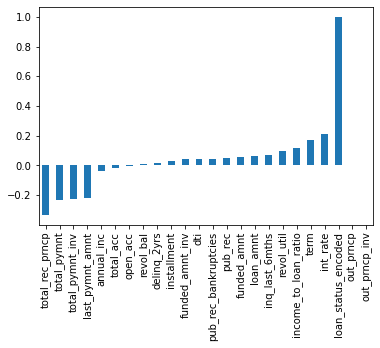

In [193]:
corr['loan_status_encoded'].sort_values().plot(kind='bar')

In [194]:
corr['loan_status_encoded'].sort_values()

total_rec_prncp        -0.331492
total_pymnt            -0.231981
total_pymnt_inv        -0.229273
last_pymnt_amnt        -0.221270
annual_inc             -0.039307
total_acc              -0.020107
open_acc               -0.006583
revol_bal               0.008034
delinq_2yrs             0.019366
installment             0.028867
funded_amnt_inv         0.040474
dti                     0.045664
pub_rec_bankruptcies    0.046377
pub_rec                 0.050660
funded_amnt             0.058623
loan_amnt               0.061729
inq_last_6mths          0.070616
revol_util              0.100258
income_to_loan_ratio    0.119352
term                    0.174767
int_rate                0.209980
loan_status_encoded     1.000000
out_prncp                    NaN
out_prncp_inv                NaN
Name: loan_status_encoded, dtype: float64